In [1]:
using Revise
using Plots
using BilevelTrajOpt

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [13]:
h = 0.05 # step size
M = 1.0 # mass
G = [0, -9.81] # gravity
C = [0, 1]; # contact normal

q0 = [-1, 0]
v0 = [0, -1]
λ0 = 0.
q = [-1, 0]
v = [0, 1.];

In [14]:
contact_forces(h,M,G,C,q0,v0,q,v)[1][1]

-----------------------------------------------------------------
           OSQP v0.4.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 1, constraints m = 2
          nnz(P) + nnz(A) = 3
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off

iter   objective    pri res    dua res    rho        time
   1  -1.0142e+03   0.00e+00   7.66e+01   1.00e-01   7.33e-05s
  50  -2.4810e+03   2.39e-14   1.96e-04   1.00e-01   9.16e-05s

status:               solved
number of iterations: 50
optimal objec

49.80990207478896

In [15]:
newton_contact_forces(h,M,G,C,q0,v0,λ0,q,v)

49.81

In [16]:
dnewton_contact_forces(h,M,G,C,q0,v0,λ0,q,v)

4-element Array{Float64,1}:
 -0.0
 -0.5
 -0.0
 20.0

In [22]:
q0 = [-1, 0.5]
v0 = [2, 0.5]
N = 15
results_implicit = simulate_implicit(h, M, G, C, q0, v0, N)

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       16
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        1
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       16
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        1
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

5×16 Array{Float64,2}:
 -1.0  -0.9          -0.8         -0.7          …   0.4           0.5        
  0.5   0.500475      0.476425     0.42785          5.06744e-16   5.06744e-16
  2.0   2.0           2.0          2.0              2.0           2.0        
  0.5   0.0095       -0.481       -0.9715          -1.13301e-22  -1.79211e-22
  0.0   8.17881e-14   1.0033e-13   1.48196e-13      9.81          9.81       

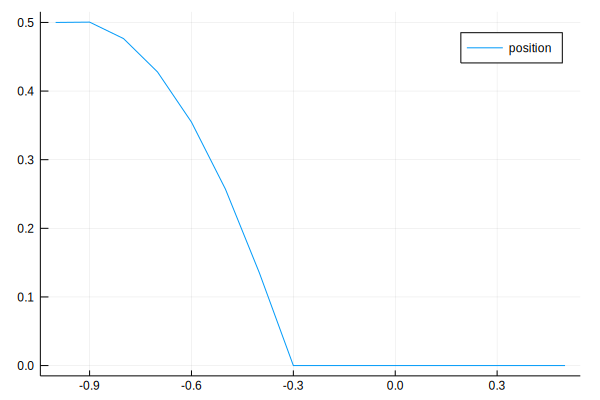

In [30]:
plot(results_implicit[1,:],results_implicit[2,:],label="position")

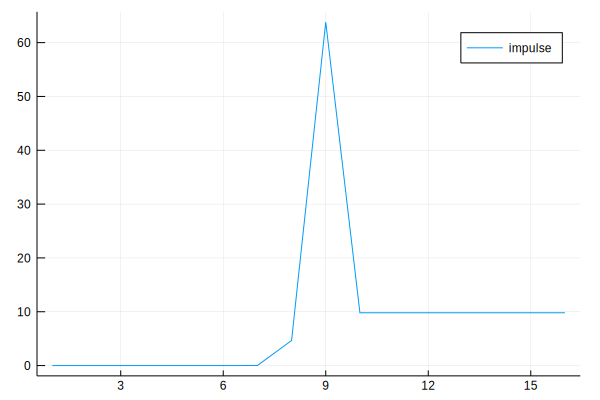

In [28]:
plot(results_implicit[5,:],label="impulse")

In [35]:
q0 = [-1, 0.5]
v0 = [2, 0.5]
N = 15
results = simulate(h, M, G, C, q0, v0, N)

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       25
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        5
                     variables with only upper bounds:        0
Total number of equality constraints.................:        5
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

5×16 Array{Float64,2}:
 -1.0  -0.9       -0.8       -0.7      …   0.4           0.5        
  0.5   0.500475   0.476425   0.42785     -2.63883e-16  -2.63883e-16
  2.0   2.0        2.0        2.0          2.0           2.0        
  0.5   0.0095    -0.481     -0.9715      -2.29589e-41  -2.29589e-41
  0.0   0.0        0.0        0.0          9.81          9.81       

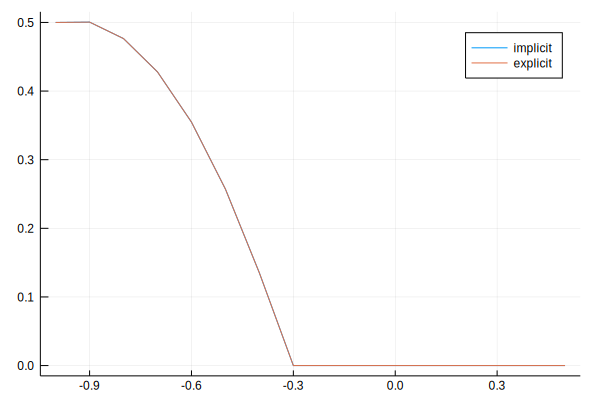

In [36]:
plot(results_implicit[1,:],results_implicit[2,:],label="implicit")
plot!(results[1,:],results[2,:],label="explicit")